In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

----------------------------------------------------------------------
Feature Descriptions

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

----------------------------------------------------------------------
Basic Statistics
                    mean          std         min           max
MedInc          3.870671     1.899822    0.499900     15.000100
HouseAge       28.639486    12.585558    1.000000     52.000000
AveRooms        5.4290

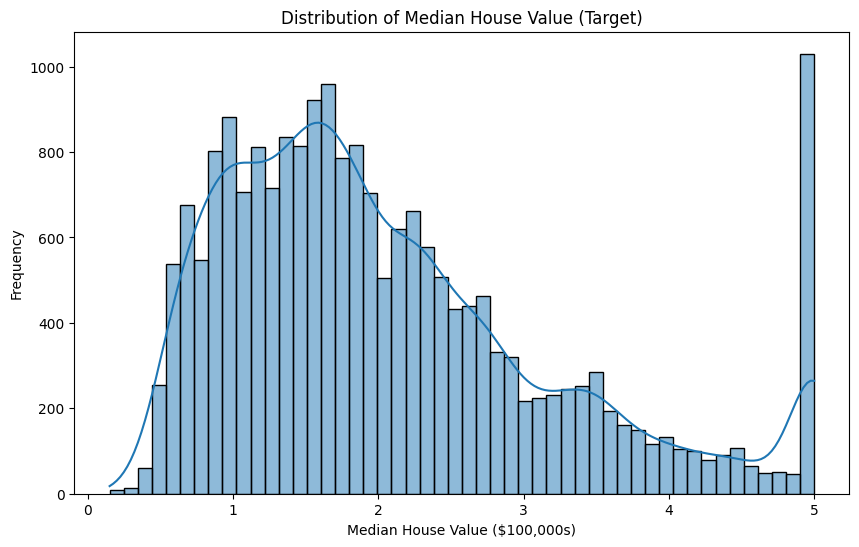

In [28]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

print("-"*70)
print("Feature Descriptions")
print(housing.DESCR.split('..')[0])
print(df.info()) 

print("\n"+"-"*70)
print("Basic Statistics")
print(df.describe().T[['mean', 'std', 'min', 'max']])

plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title('Distribution of Median House Value (Target)')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.show()

In [29]:
print(housing.data.shape, housing.target.shape)
X = housing.data
y = housing.target
print(X.head())
print(y.head())

(20640, 8) (20640,)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [31]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
print(type(X_train))

(12384, 8) (12384,) (4128, 8) (4128,) (4128, 8) (4128,)
<class 'pandas.DataFrame'>


In [32]:
threshold = np.median(y_train)

In [33]:
y_cls_train=(y_train>=threshold).astype(int)
y_cls_val=(y_val>=threshold).astype(int)
y_cls_test=(y_test>=threshold).astype(int)